# **Phase 1 Milestone 2** 
*Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.*


# Prediksi Biaya Asuransi Kesehatan Personal

### Problem
- Asuransi kesehatan biayanya mahal

### Background
Kesadaran berasuransi yang masih minim boleh jadi dipengaruhi oleh banyaknya pemahaman yang keliru tentang asuransi.

Berikut ini beberapa pandangan yang keliru tentang asuransi kesehatan yang banyak beredar di masyarakat:
- Beli asuransi kesehatan sama saja buang-buang uang
- Percuma beli tapi klaim sulit
- Mencampuradukkan fungsi proteksi dan investasi
- Asuransi kesehatan biayanya mahal
- Asuransi Kesehatan sudah memadai

Biaya premi pada setiap pasien berbeda-beda. Biaya tersebut tergantung pada banyak faktor, antara lain diagnosis penyakit, jenis/tempat perawatan, kota, usia, dan sebagainya.

**Sekedar informasi:**
- Makin tua umur nasabah maka preminya akan semakin mahal.
- Premi juga akan semakin mahal jika nasabah yang diasuransikan adalah seorang perokok.
- Ada perbedaan harga premi untuk nasabah laki-laki dan perempuan
- Sementara itu, orang yang memiliki kelebihan berat badan juga akan membayar premi lebih mahal daripada orang yang memiliki berat badan normal.


### Goals
Dapat memprediksi seberapa besar biaya asuransi kesehatan yang layak dibayar nasabah / pasien baru dalam satu tahun


### Dataset
Dataset yang digunakan berasal dari [kaggle](https://www.kaggle.com/mirichoi0218/insurance)

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

### **i. PERKENALAN**

##### **Nama :Dennis Herdiawan**
##### **Batch : 004**

---

## **Objectives**
Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning



### **ii. Import pustaka yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, SelectPercentile
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### **iii. Data Loading**

In [2]:
df = pd.read_csv('insurance.csv')

### iv Data Cleaning

In [3]:
df.isnull().sum().any()

False

In [4]:
print(f"Is there any duplicated rows? \n{df.duplicated().any()}")
print(f"\nHow many? \n{df.duplicated().sum()} rows")

Is there any duplicated rows? 
True

How many? 
1 rows


In [5]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

### v. Explorasi Data

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1337, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / (len(df))) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', '%null', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,%null,unique,uniqueSample
0,age,int64,0,0.0,47,"[56, 64]"
1,sex,object,0,0.0,2,"[female, male]"
2,bmi,float64,0,0.0,548,"[39.82, 28.16]"
3,children,int64,0,0.0,6,"[1, 5]"
4,smoker,object,0,0.0,2,"[no, yes]"
5,region,object,0,0.0,4,"[southwest, northwest]"
6,charges,float64,0,0.0,1337,"[43578.9394, 24671.66334]"


In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.describe(include='O')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [12]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

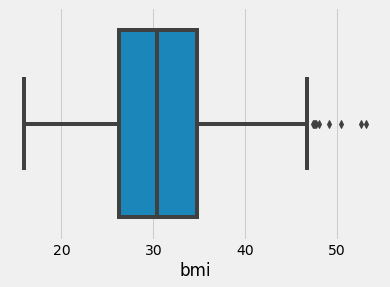

In [13]:
sns.boxplot(x=df['bmi'])
plt.show()

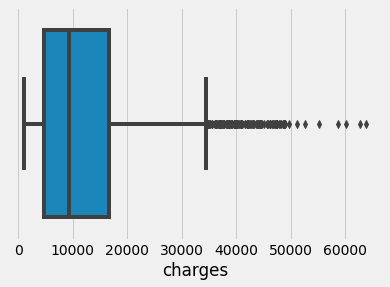

In [14]:
sns.boxplot(x=df['charges'])
plt.show()

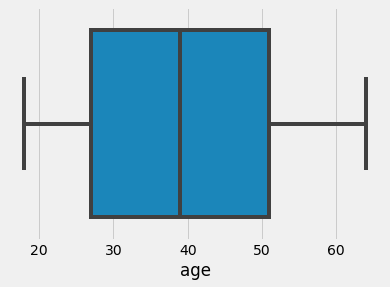

In [15]:
sns.boxplot(x=df['age'])
plt.show()

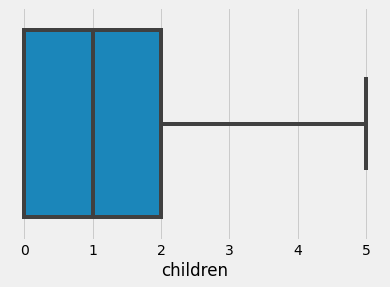

In [16]:
sns.boxplot(x=df['children'])
plt.show()

In [17]:
def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q3 = np.quantile(yourList, .75)

    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outlier = []
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier.append(yourList[i])
        if yourList[i] < batas_bawah:
            outlier.append(yourList[i])
    return len(outlier)

In [18]:
list_random_data = df.bmi.tolist()

find_outlier(list_random_data)

9

In [19]:
list_random_data = df.charges.tolist()

find_outlier(list_random_data)

139

In [20]:
(139/len(df)) * 100

10.396409872849663

**Adanya data outliers pada kolom 'bmi' dan 'charges'. Data outliers tersebut, tidak saya drop. melihat ada 139 data outliers pada charges, 10% dari keseluruhan data**

### EDA

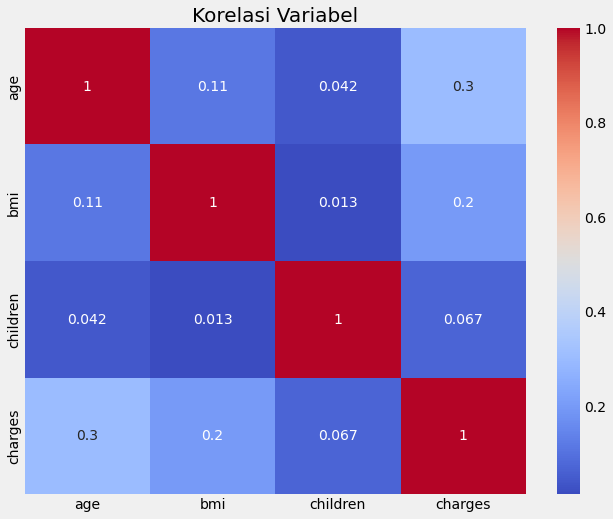

In [21]:
plt.figure(figsize=(10,8))
plt.title('Korelasi Variabel', size = 20)
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.show()

Korelasi yang tinggi pada kategori 'smoker'

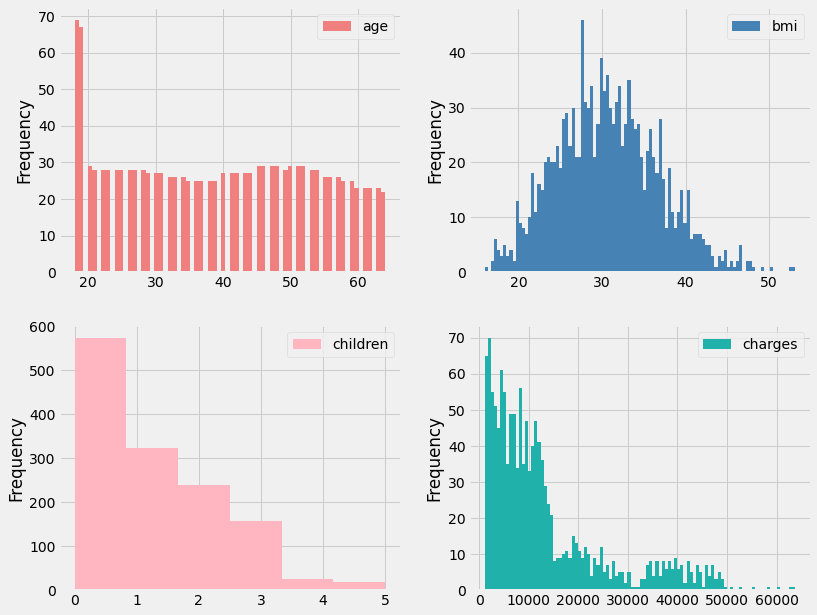

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="lightcoral", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="steelblue", ax=axes[0][1])
df.plot(kind="hist", y="children", bins=6, color="lightpink", ax=axes[1][0])
df.plot(kind="hist", y="charges", bins=100, color="lightseagreen", ax=axes[1][1])
plt.show()

Pada dataset, nasabah terbanyak pada usia dibawah 20 tahun, BMI diantara 25 - 35, yang tidak memiliki anak, dan memiliki charges dibawah 20000 USD

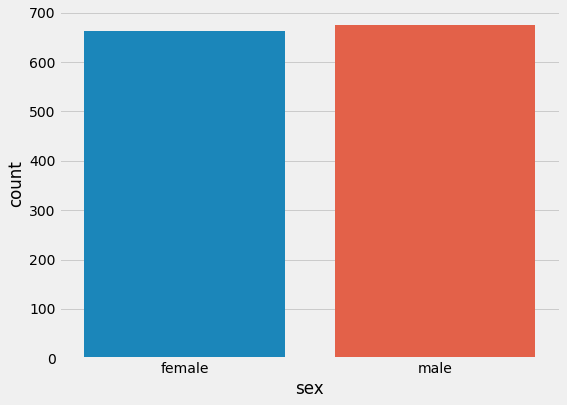

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(df.sex)
plt.show()

Tidak ada perbedaan yang signifikan antara kedua gender

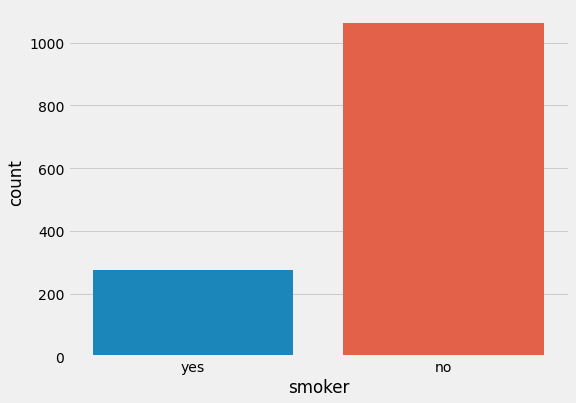

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(df.smoker)
plt.show()

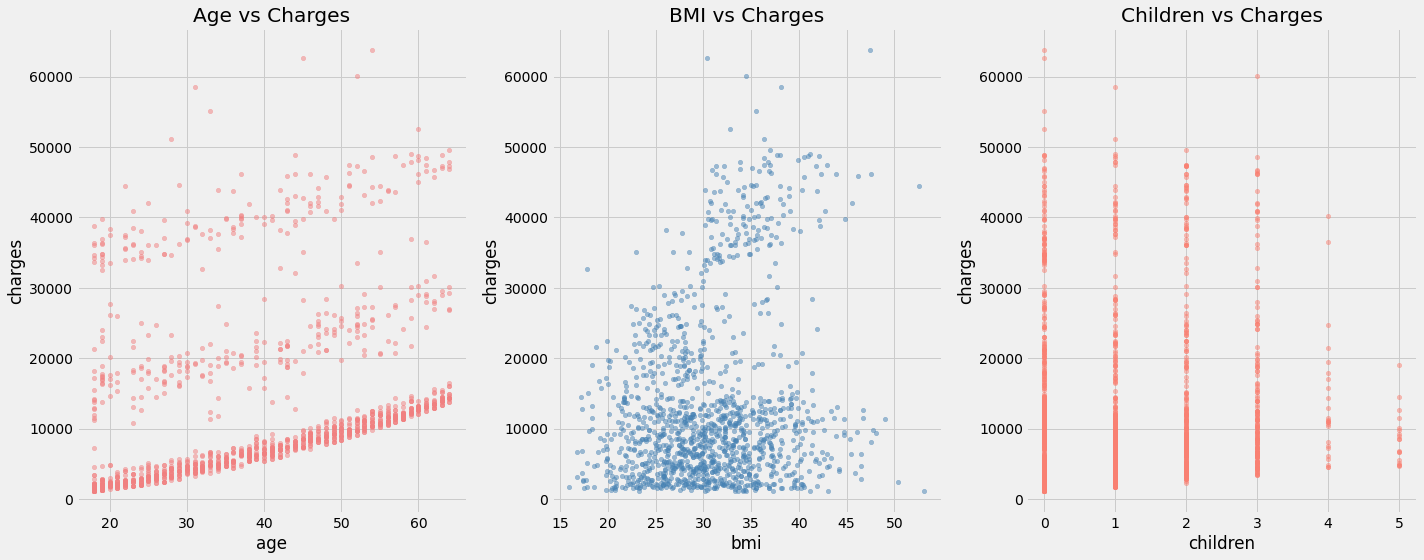

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
df.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='lightcoral', ax=axes[0], title="Age vs Charges")
df.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='steelblue', ax=axes[1], title="BMI vs Charges")
df.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='salmon', ax=axes[2], title="Children vs Charges")
plt.tight_layout()
plt.show()

jika dibandingkan dengan charges, terlihat pada usia, semakin bertambah usia, semakin besar juga charges-nya. jika dilihat dari grafik bmi, charges tertinggi berada pada bmi yang besar juga. untuk grafik children, charges tertinggi dimiliki nasabah yang tidak memiliki anak

#### Smoker & Non-Smoker

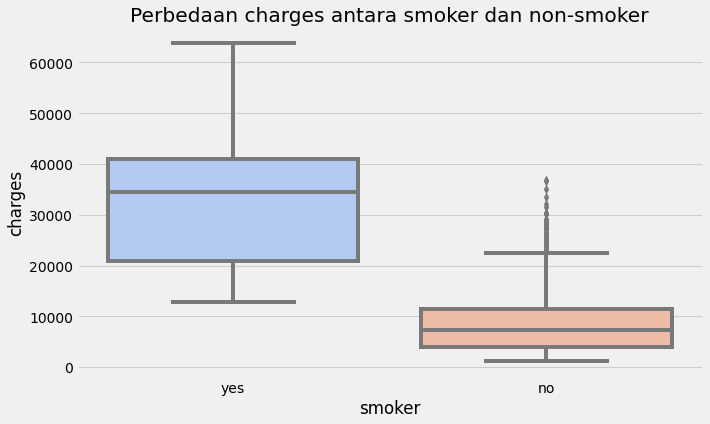

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(df['smoker'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antara smoker dan non-smoker')
plt.show()

Grafik ini menunjukkan bahwa nasabah perokok mempunyai charges yang lebih besar dibandingkan dengan nasabah yang non-perokok

In [27]:
df[(df['charges'] > 0)].groupby('smoker').describe()['charges'].sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


- charges pada smoker mulai dari > 10000 USD dan ada yang membayar lebih dari 60000 USD
- sedangkan dengan non-smoker charges dimulai dibawah 10000 USD dan harga tertinggi kurang dari 40000 USD

#### Usia

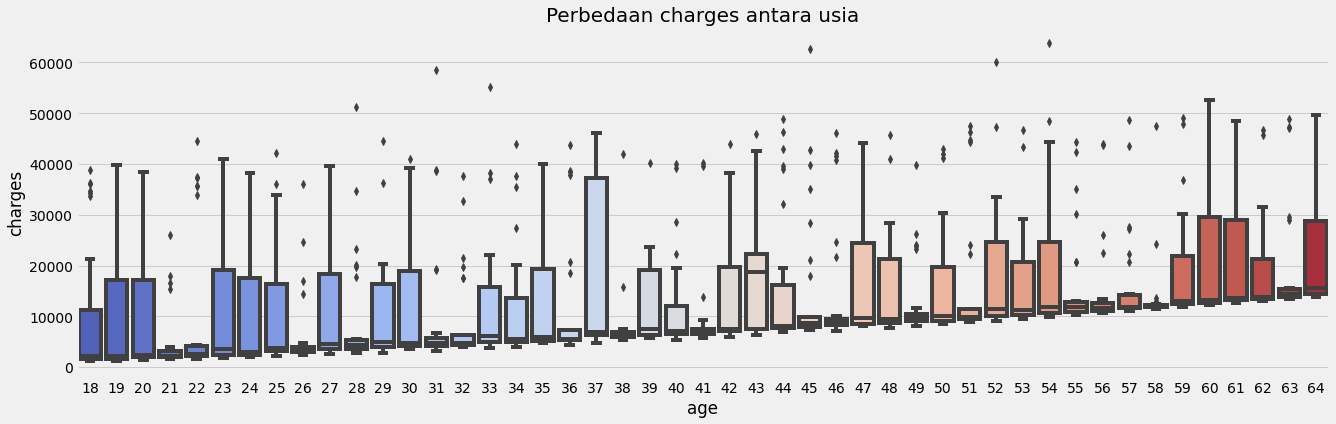

In [28]:
plt.figure(figsize=(20,6))
sns.boxplot(df['age'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antara usia', size = 20)
plt.show()

In [29]:
df[(df['charges'] > 0)].groupby('age').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18,69.0,7086.217556,10198.459989,1121.87390,1633.044400,2198.189850,11272.331390,38792.68560
19,67.0,9868.929428,12523.348425,1241.56500,1642.996400,2136.882250,17216.880150,39722.74620
20,29.0,10159.697736,12049.624794,1391.52870,1967.022700,2459.720100,17085.267600,38344.56600
21,28.0,4730.464330,6168.059334,1515.34490,1985.288350,2254.423600,3205.349712,26018.95052
22,28.0,10012.932802,14653.363670,1664.99960,2155.351375,2641.155700,4078.134675,44501.39820
23,28.0,12419.820040,13421.332226,1815.87590,2432.780150,3594.538000,19145.024148,40904.19950
24,28.0,10648.015962,12203.650633,1969.61400,2462.839600,3045.137650,17508.424985,38126.24650
25,28.0,9838.365311,11551.289468,2137.65360,3160.320800,3750.148925,16333.214445,42112.23560
26,28.0,6133.825309,7765.729490,2302.30000,2921.320525,3388.882175,3983.464100,36085.21900


- charges paling tinggi dibayar oleh nasabah dengan usia 54
- charges paling rendah dibayar oleh nasabah dengan usia 18
- grafik ini juga menunjukkan bahwa makin tua umur nasabah maka semakin besar chargesnya

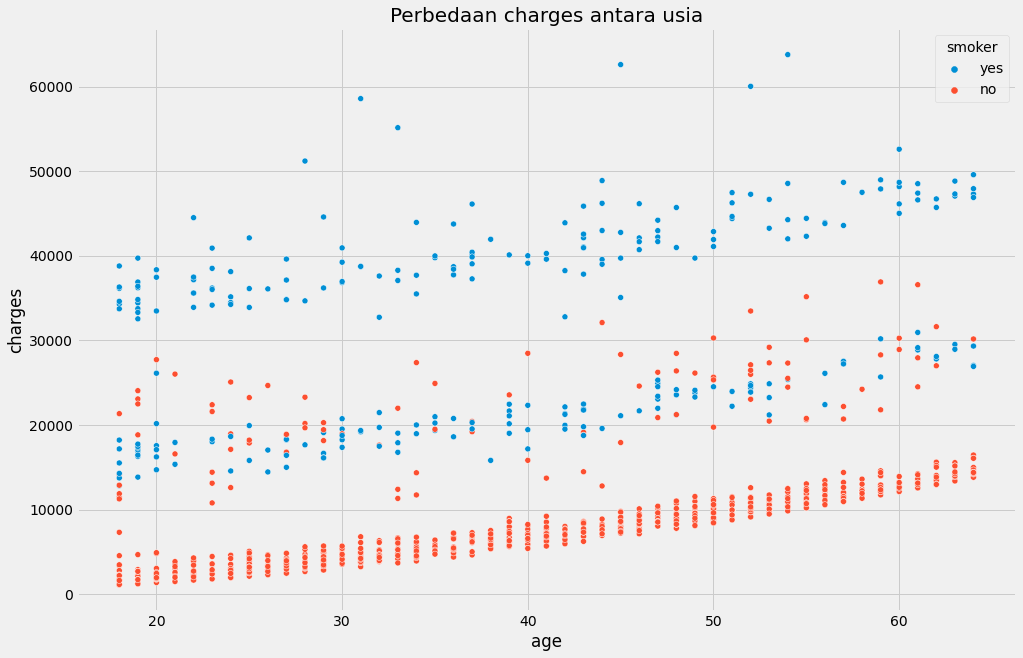

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.age, df.charges, hue=df.smoker)
plt.title('Perbedaan charges antara usia', size = 20)
plt.show()

- grafik ini juga menunjukkan bahwa nasabah dengan usia yang lebih tua dan smoker memiliki charges yang lebih besar. Diperparah oleh faktor nasabah tersebut seorang perokok

#### Gender

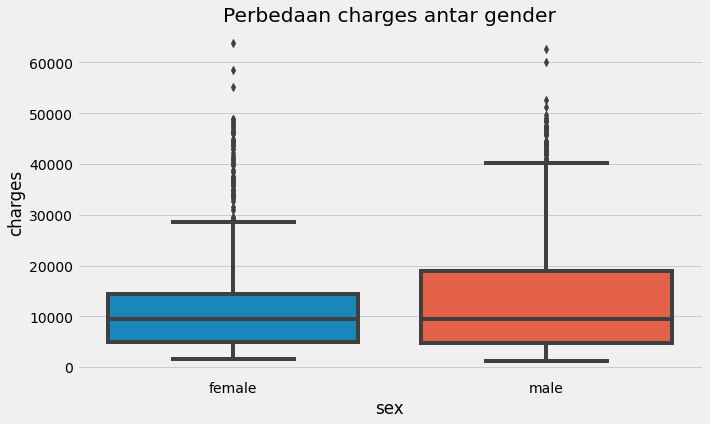

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(df['sex'],df['charges'])
plt.title('Perbedaan charges antar gender')
plt.show()

Nasabah yang ber-gender male lebih besar biaya asuransinya dibandingkan dengan nasabah yang ber-gender female, walaupun perbedaan tidak terlalu signifikan.

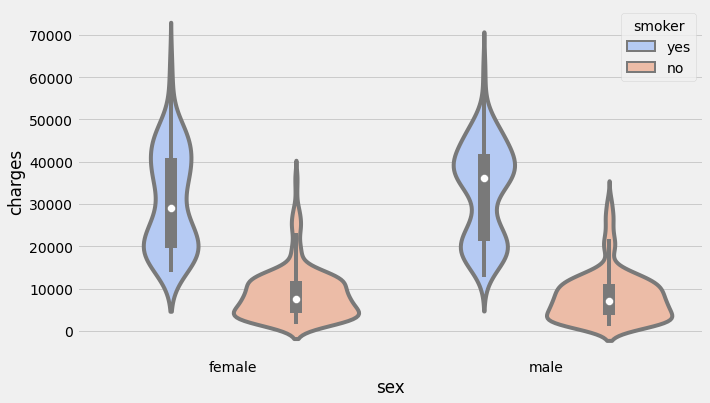

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(df.sex, df.charges, hue=df.smoker, palette='coolwarm')
plt.show()

Pada grafik dilihat persebaran datanya menunjukkan jika nasabah berjenis kelamin laki-laki / male dan merokok / smoker memang memiliki charges yang lebih tinggi

In [33]:
df[(df['charges'] > 0)].groupby('sex').describe()['charges'].sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
male,675.0,13974.998864,12971.958663,1121.8739,4654.022675,9377.9047,19006.685500,62592.87309
female,662.0,12569.578844,11128.703801,1607.5101,4885.158700,9412.9625,14454.691825,63770.42801


- charge paling rendah adalah nasabah male dengan charges 1121
- charge paling tinggi adalah nasabah female dengan charges 63770 berbeda tipis dengan nasabah male dengan charges 62592

#### BMI

In [34]:
df.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [35]:
df.bmi.nunique()

548

Pembuatan kategori hanya untuk melihat grafik lebih baik. dikarenakan, kategori BMI memiliki jumlah unique data sebanyak 548 data.

In [36]:
# TypeError: list indices must be integers or slices, not float
bmi_code = df.bmi.astype('int64')

bmi_code = bmi_code.tolist()
# bentuk float tidak dapat dimasukkan ke dalam suatu kategori. jadi saya ganti menjadi int64 dan masukkan ke dalam list. lalu saya kategorikan

In [37]:
code_bmi = []
for i in bmi_code:
    if bmi_code[i] <= 18.0:
        code_bmi.append('Underweight')
    elif 18.0 > bmi_code[i] <= 24.0:
        code_bmi.append('Healthy')
    elif 24.0 > bmi_code[i] <= 29.0:
        code_bmi.append('Overweight')
    elif 29.0 > bmi_code[i] <= 39.0:
        code_bmi.append('Obese')
    else:
        code_bmi.append('Extremely Obese')

In [38]:
df_with_code_bmi = df.copy()

In [39]:
df_with_code_bmi['bmi_code'] = code_bmi

In [40]:
df_with_code_bmi.head()

,age,sex,bmi,children,smoker,region,charges,bmi_code
0,19,female,27.900,0,yes,southwest,16884.92400,Extremely Obese
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Extremely Obese
4,32,male,28.880,0,no,northwest,3866.85520,Underweight


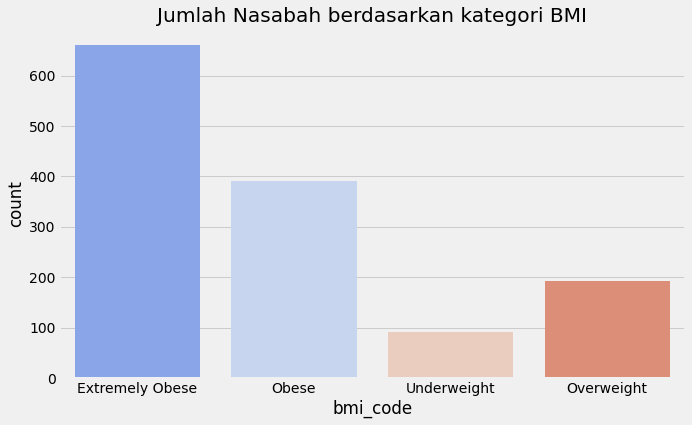

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(df_with_code_bmi.bmi_code, palette='coolwarm')
plt.title('Jumlah Nasabah berdasarkan kategori BMI')
plt.show()

Pada grafik dapat dilihat, bahwa nasabah terbanyak memiliki BMI 'Extremely Obese' dan tidak ada nasabah yang memiliki BMI 'Healthy'. 

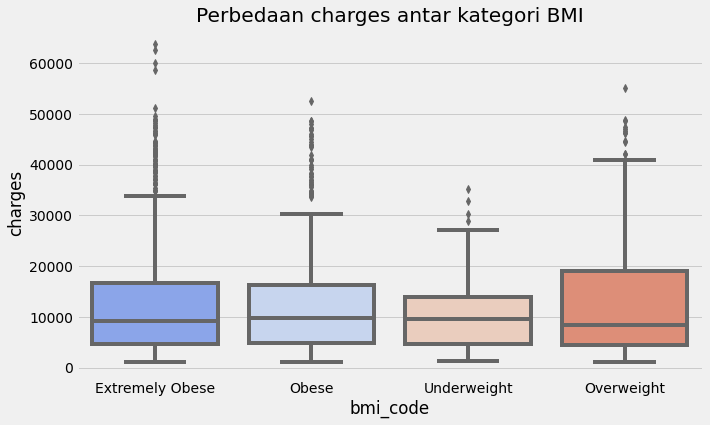

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(df_with_code_bmi['bmi_code'],df_with_code_bmi['charges'],palette='coolwarm')
plt.title('Perbedaan charges antar kategori BMI')
plt.show()

In [43]:
df[(df['charges'] > 0)].groupby('bmi').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
bmi,,,,,,,,
23.21,5.0,10699.798088,11901.189392,1121.87390,1515.34490,3561.88890,22218.114900,25081.76784
30.14,2.0,6506.738100,7601.725288,1131.50660,3819.12235,6506.73810,9194.353850,11881.96960
33.33,7.0,14032.503766,15627.565592,1135.94070,2771.27870,8283.68070,23342.532700,36580.28216
33.66,5.0,7250.033200,6375.015792,1136.39940,2498.41440,4504.66240,12949.155400,15161.53440
34.10,8.0,12245.810147,13274.932799,1137.01100,4800.15875,8279.73650,12853.425545,40182.24600
...,...,...,...,...,...,...,...,...
37.70,1.0,48824.450000,NaN,48824.45000,48824.45000,48824.45000,48824.450000,48824.45000
36.96,1.0,49577.662400,NaN,49577.66240,49577.66240,49577.66240,49577.662400,49577.66240
36.40,1.0,51194.559140,NaN,51194.55914,51194.55914,51194.55914,51194.559140,51194.55914


Pada tabel dapat dilihat dari data minimal charges, bahwa semakin besar nilai BMI maka semakin besar juga chargesnya

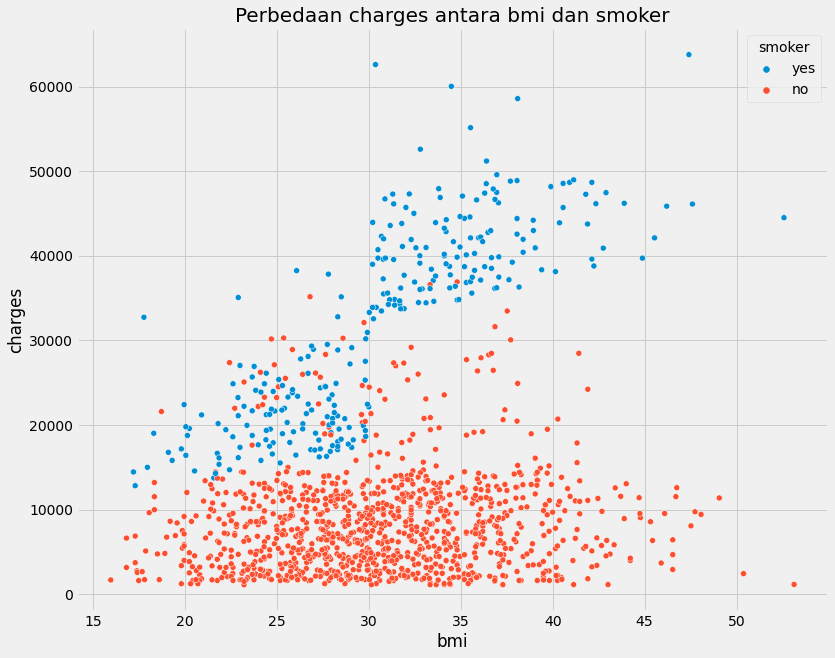

In [44]:
plt.figure(figsize=(12,10))
sns.scatterplot(df.bmi, df.charges, hue=df.smoker)
plt.title('Perbedaan charges antara bmi dan smoker', size = 20)
plt.show()

Grafik ini menunjukkan, bahwa nasabah dengan bmi yang besar dan merokok memiliki charges yang lebih tinggi

#### Children

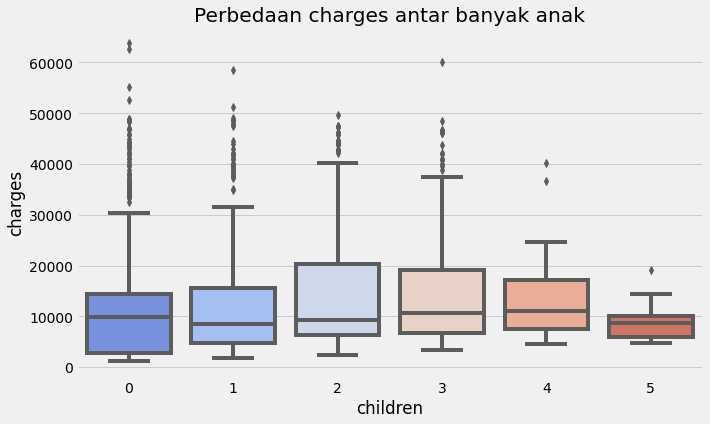

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(df['children'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antar banyak anak')
plt.show()

Grafik ini dilihat, jika charges paling tinggi dan paling rendah dimiliki oleh nasabah yang tidak memiliki anak

In [46]:
df[(df['charges'] > 0)].groupby('children').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,573.0,12384.695344,12025.424152,1121.8739,2741.948000,9863.47180,14449.854400,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


Pada tabel dapat dilihat dari data minimal charges, bahwa semakin banyak anak yang ditanggung maka semakin besar juga chargesnya

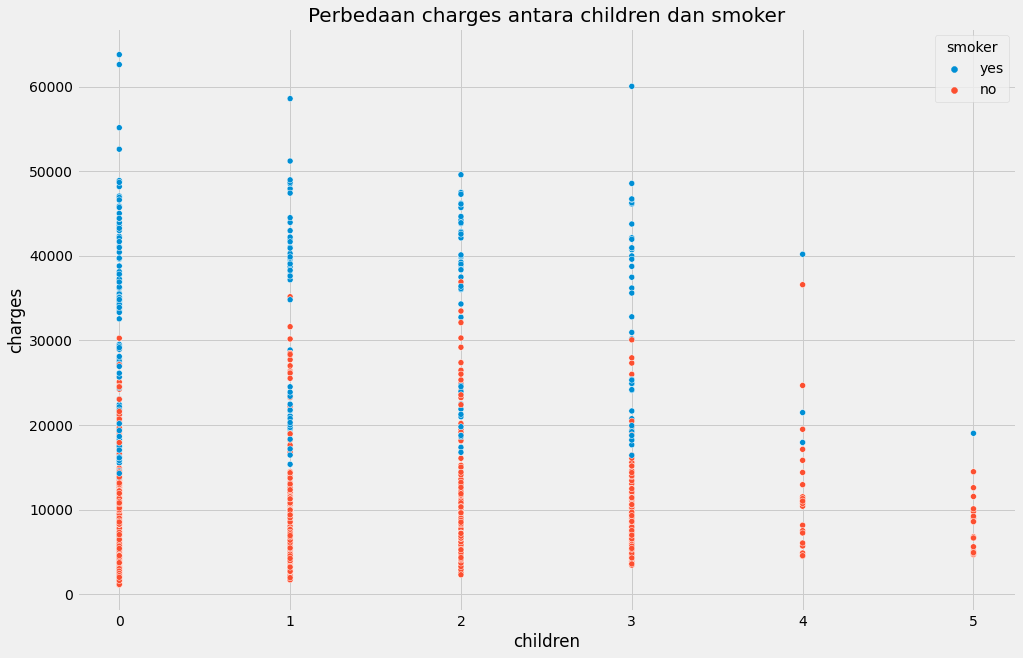

In [47]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.children, df.charges, hue=df.smoker)
plt.title('Perbedaan charges antara children dan smoker', size = 20)
plt.show()

Pada grafik dapat dilihat, bahwa nasabah yang bukan perokok memiliki charges yang lebih rendah jika dibandingkan dengan nasabah yang perokok walaupun tidak memiliki anak

#### Region

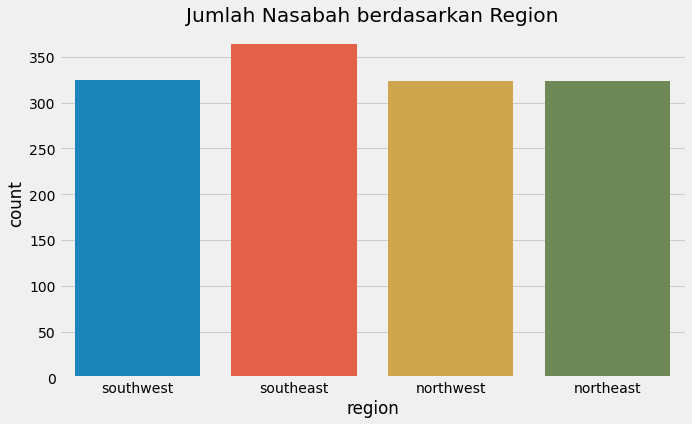

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(df.region)
plt.title('Jumlah Nasabah berdasarkan Region')
plt.show()

Pada grafik dapat dilihat, bahwa nasabah terbanyak berada di southeast

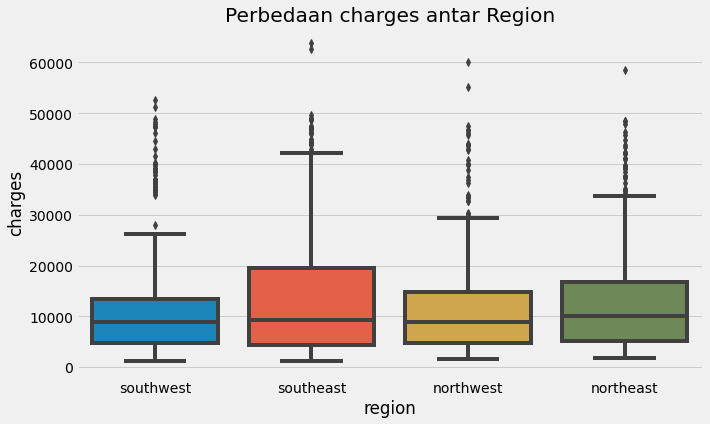

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(df['region'],df['charges'])
plt.title('Perbedaan charges antar Region')
plt.show()

In [50]:
df[(df['charges'] > 0)].groupby('region').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.286900,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.520000,52590.82939
northwest,324.0,12450.840844,11073.125699,1621.3402,4733.635288,8976.977250,14788.747863,60021.39897
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.364100,58571.07448


charge paling tinggi dan rendah berada di region southeast 

#### Melihat distribusi data pada setiap kolom numberik

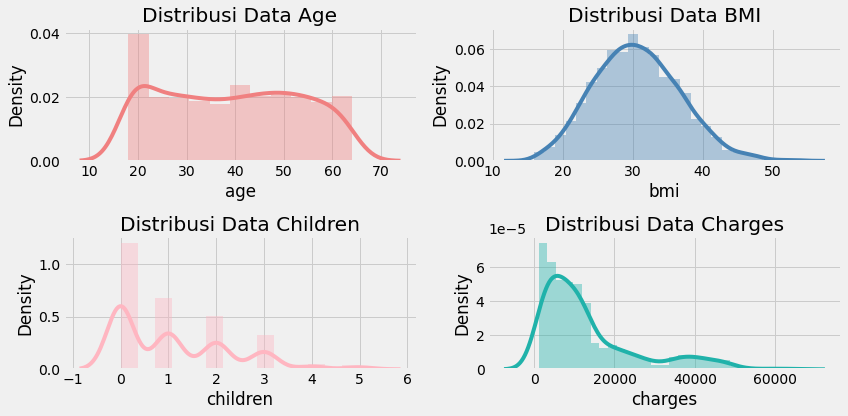

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.distplot(df.age, color = "lightcoral")
plt.title('Distribusi Data Age')

plt.subplot(222)
sns.distplot(df.bmi, color = "steelblue")
plt.title('Distribusi Data BMI')

plt.subplot(223)
sns.distplot(df.children, color = "lightpink")
plt.title('Distribusi Data Children')

plt.subplot(224)
sns.distplot(df.charges, color = "lightseagreen")
plt.title('Distribusi Data Charges')

plt.tight_layout()
plt.show()

hanya data BMI yang terdistribusi normal. dengan tujuan goals pada charges, maka data tersebut merupakan data tidak terdistribusi normal

 ### vi. Data Preprocessing

#### distribusi label

In [52]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [53]:
df[df['charges'] == 0]

,age,sex,bmi,children,smoker,region,charges


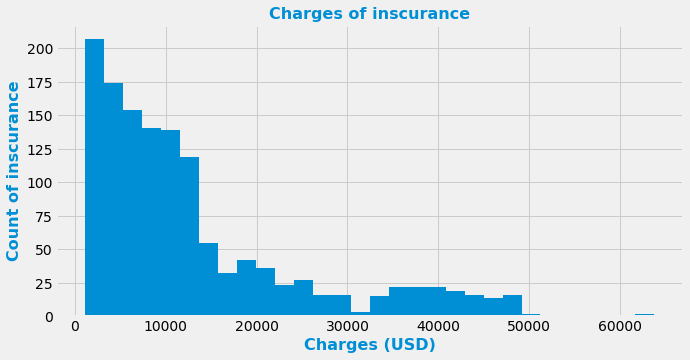

In [54]:
plt.figure(figsize=(10, 5));
df['charges'].hist(bins = 30);
plt.title('Charges of inscurance', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of inscurance', weight = 'bold', size = 16, color='C0');
plt.xlabel('Charges (USD)', weight = 'bold', size= 16, color='C0');

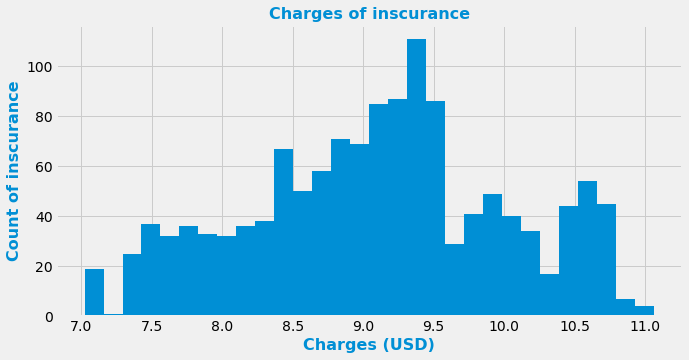

In [55]:
#mengubah ke log
df['log_charges'] = np.log1p(df['charges'])

plt.figure(figsize=(10, 5));
df['log_charges'].hist(bins = 30);
plt.title('Charges of inscurance', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of inscurance', weight = 'bold', size = 16, color='C0');
plt.xlabel('Charges (USD)', weight = 'bold', size= 16, color='C0');

In [56]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_charges'],
      dtype='object')

In [57]:
df.drop(['charges'],axis =1,inplace=True)

In [58]:
X = df.drop(columns='log_charges')
y = df['log_charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2021)

In [59]:
for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [60]:
transformer = ColumnTransformer([
    ('impute',SimpleImputer(strategy='median'),['age']),
    ('onehot',OneHotEncoder(drop='first'),['sex','smoker']),
    ('binari',ce.BinaryEncoder(drop_invariant=True), ['region']),
    ('standar',StandardScaler(),['bmi','children'])
],remainder='passthrough')

### vii. Pendefinisian Model

#### Benchmark model

In [61]:
Ridge = Ridge(random_state=2021, max_iter=100000)
ridge_pipe = Pipeline([
    ('preprocessor',transformer),
      ('Ridge', Ridge)])
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('Ridge', Ridge(max_iter=100000, random_state=2021))])

In [62]:
Lasso = Lasso(random_state=2021)
lasso_pipe = Pipeline([
    ('preprocessor',transformer),
      ('lasso',Lasso)])
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('lasso', Lasso(random_state=2021))])

In [63]:
Elastic_Net = ElasticNet(random_state= 2021)
Elastic_Net_pipe = Pipeline([
    ('preprocessor',transformer),
      ('elastic_net',Elastic_Net)])
Elastic_Net_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('elastic_net', ElasticNet(random_state=2021))])

In [64]:
Decision_Tree = DecisionTreeRegressor(random_state = 2021) 
Decision_Tree_pipe = Pipeline([
    ('preprocessor',transformer),
      ('Tree',Decision_Tree)])
Decision_Tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('Tree', DecisionTreeRegressor(random_state=2021))])

In [65]:
KNN = KNeighborsRegressor()
knn_pipe = Pipeline([
    ('preprocessor',transformer),
      ('knn',KNN)])
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('knn', KNeighborsRegressor())])

In [66]:
Random_Forest = RandomForestRegressor(random_state=2021)
forest_pipe = Pipeline([
    ('preprocessor',transformer),
      ('forest',Random_Forest)])
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('forest', RandomForestRegressor(random_state=2021))])

In [67]:
XGB = XGBRegressor(random_state=2021)
xgb_pipe = Pipeline([
    ('preprocessor',transformer),
      ('boost',XGB)])
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('boost',
                 XGBRegressor(base_score=0.5, booster='...
                              gamma=0, gpu_id=

In [68]:
def evaluation_metrics(model, x_test, y_test):
    prediksi = model.predict(x_test)
    MSE = mean_squared_error(y_test, prediksi)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(y_test, prediksi)
    print(f'RMSE: {round(RMSE, 3)}')
    print(f'R2_SCORE: {round(r2, 3)}')
    val = dict()
    val['RMSE'] = RMSE
    val['R2'] = r2
    return val

In [69]:
ridgeAcc = evaluation_metrics(ridge_pipe, X_test, y_test)
lassoAcc = evaluation_metrics(lasso_pipe, X_test, y_test)
elasticNetAcc = evaluation_metrics(Elastic_Net_pipe, X_test, y_test)
treeAcc = evaluation_metrics(Decision_Tree_pipe, X_test, y_test)
knnAcc = evaluation_metrics(knn_pipe, X_test, y_test)
forestAcc = evaluation_metrics(forest_pipe, X_test, y_test)
xgbAcc = evaluation_metrics(xgb_pipe, X_test, y_test)

RMSE: 0.479
R2_SCORE: 0.745
RMSE: 0.793
R2_SCORE: 0.302
RMSE: 0.788
R2_SCORE: 0.311
RMSE: 0.501
R2_SCORE: 0.721
RMSE: 0.679
R2_SCORE: 0.487
RMSE: 0.441
R2_SCORE: 0.784
RMSE: 0.472
R2_SCORE: 0.753


## Cross Validation 3 best Model benckmark

In [70]:
#1.Ridge
r2_ridge = cross_val_score(ridge_pipe, X_train, y_train, cv=10, scoring='r2')
print('Cross Validation Score: ', r2_ridge)

#get the mean of each fold 
print("Average Cross Validation score:", r2_ridge.mean() * 100)

Cross Validation Score:  [0.84412879 0.86524903 0.75906017 0.73236152 0.75423603 0.77293082
 0.76597985 0.82290605 0.72279394 0.62558122]
Average Cross Validation score: 76.65227419752483


In [71]:
#2.Random Forest
r2_forest = cross_val_score(forest_pipe, X_train, y_train, cv=10, scoring='r2')
print('Cross Validation Score: ', r2_forest)

#get the mean of each fold 
print("Average Cross Validation score:", r2_forest.mean() * 100)

Cross Validation Score:  [0.91903934 0.92492172 0.84972677 0.73850781 0.82344867 0.78771518
 0.83176894 0.83952589 0.75352894 0.66355001]
Average Cross Validation score: 81.31733284997544


In [72]:
#3.Boost
r2_boost = cross_val_score(xgb_pipe, X_train, y_train, cv=10, scoring='r2')
print('Cross Validation Score: ', r2_boost)

#get the mean of each fold 
print("Average Cross Validation score:", r2_boost.mean() * 100)

Cross Validation Score:  [0.90577605 0.88531073 0.84269622 0.71890508 0.78498429 0.80445972
 0.7485944  0.81509601 0.71993434 0.60977957]
Average Cross Validation score: 78.35536402588238


### Hyperparameter with feature selection 

In [73]:
rfr_params = {
    'forest__criterion': ['mse', 'mae'], 
    'forest__max_depth': [5, 10, 20, 40, 50],
    'forest__min_samples_split': [2, 5, 10, 20],
    'forest__min_samples_leaf': [1, 2, 5, 10],
    'forest__max_features': ['auto', 'sqrt']
}

Random_Forest2 = RandomForestRegressor(random_state=2021)
forest2_pipe = Pipeline([
    ('preprocessor',transformer),
    ('percen', SelectPercentile(percentile=50)),
    ('forest',Random_Forest2)])
forest2_pipe.fit(X_train, y_train)

forest_cv = GridSearchCV(forest2_pipe, rfr_params, scoring="r2", n_jobs=-1, verbose=1, cv=5)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)
forest_tuned = forest_cv.best_estimator_.fit(X_train, y_train)
foresttunedAcc = evaluation_metrics(forest_tuned, X_test, y_test)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
{'forest__criterion': 'mse', 'forest__max_depth': 5, 'forest__max_features': 'sqrt', 'forest__min_samples_leaf': 5, 'forest__min_samples_split': 20}
RMSE: 0.459
R2_SCORE: 0.766


In [74]:
xgb_params = {
    'boost__n_estimators': [10, 20, 50, 100],
    'boost__max_depth': [2, 5, 10, 20],
    'boost__learning_rate': np.geomspace(0.001, 1, 4)
}

xgb2 = XGBRegressor(random_state=2021)
boost2_pipe = Pipeline([
    ('preprocessor',transformer),
    ('percen', SelectPercentile(percentile=50)),
    ('boost',xgb2)])
boost2_pipe.fit(X_train, y_train)

boost_cv = GridSearchCV(boost2_pipe, xgb_params, scoring="r2", n_jobs=-1, verbose=1, cv=5)
boost_cv.fit(X_train, y_train)
print(boost_cv.best_params_)
boost_tuned = boost_cv.best_estimator_.fit(X_train, y_train)
boosttunedAcc = evaluation_metrics(boost_tuned, X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'boost__learning_rate': 0.1, 'boost__max_depth': 2, 'boost__n_estimators': 100}
RMSE: 0.45
R2_SCORE: 0.775


## DEPLOYMENT

In [75]:
import joblib

In [76]:
joblib.dump(boost_tuned,'XGB_TUNED')

['XGB_TUNED']

In [77]:

pd.set_option('display.max_columns', 500)
df.head(1)

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.9,0,yes,southwest,9.734236


In [78]:
df['charges'] = np.expm1(df['log_charges'])

In [79]:
df.drop(['log_charges'],axis=1,inplace=True)

In [80]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


### x. Model Inference

In [81]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [82]:
# Pembuatan data inference
databaru = [{'age': 25,
             'sex': 'male',
             'bmi': 30,
             'children':1,
             'smoker': 'yes',
             'region': 'nortwest'}
             ]

percobaan_1 =pd.DataFrame(databaru,index=[1])
percobaan_1

,age,sex,bmi,children,smoker,region
1,25,male,30,1,yes,nortwest


In [83]:
model = joblib.load('XGB_TUNED')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  ['age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('binari',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['region']),
                                                 ('standar', StandardScaler(),
                                                  ['bmi', 'children'])])),
                ('percen', SelectPercentile(percentile=50)),
                ('b...
                              gamma=0, gpu_id=-

In [84]:
pred = model.predict(percobaan_1)

In [85]:
print("biaya asuransi yang layak sebesar $",(np.expm1(pred)[0]).round(2))

biaya asuransi yang layak sebesar $ 27503.58


In [86]:
df.to_csv('insurance_FINAL.csv', index=False)

### ix. Pengambilan Kesimpulan

In [87]:
RMSE_default = [ridgeAcc['RMSE'], lassoAcc['RMSE'], elasticNetAcc['RMSE'], treeAcc['RMSE'],knnAcc['RMSE'],forestAcc['RMSE'],
               xgbAcc['RMSE']]

R2_default = [ridgeAcc['R2'], lassoAcc['R2'], elasticNetAcc['R2'], treeAcc['R2'],knnAcc['R2'],forestAcc['R2'],
               xgbAcc['R2']]

best_model = pd.DataFrame({"RMSE_default": RMSE_default,
                          "R2_default" : R2_default},
                           index = "Ridge,Lasso,ElasticNet,DecisonTree,Knn,RandomForest,XGBoost".split(','))

In [88]:
best_model["RMSE_default"] = round(best_model["RMSE_default"], 3)
best_model["R2_default"] = round(best_model["R2_default"], 3)

In [89]:
best_model

,RMSE_default,R2_default
Ridge,0.479,0.745
Lasso,0.793,0.302
ElasticNet,0.788,0.311
DecisonTree,0.501,0.721
Knn,0.679,0.487
RandomForest,0.441,0.784
XGBoost,0.472,0.753


Saya mengambil 7 base model sebagai permodelan kali ini dengan menggunakan matrix skore akurasi yang dimna Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.

dengan penilaian 7 base model benchmark lalu saya ambil 3 terbaik dan mecari nilai cross validation.

dan hasil nya sebagai berikut :
pada tabel 1 

lalu saya memili 3 terbaik untuk di cari nilai cross validation :
1. Ridge : 76.652
2. RandomForest : 81.317
3. XGBoost	 : 78.355

setelah itu mencari 2 terbaik dan di di coba untuh hyperparameter tuning :
hasil nya adalah 
pada tabel 2

Model terbaik yang saya pilih di lihat dari nilai akurasi adalah
- XGBoost dengan nilai akurasi setelah di tuned 	RSME 0.450	R2 0.775



In [90]:
RMSE_hp = [foresttunedAcc['RMSE'],boosttunedAcc['RMSE']]

R2_hp = [foresttunedAcc['R2'],boosttunedAcc['R2']]

best_model1 = pd.DataFrame({"RMSE_hp": RMSE_hp ,
                          "R2_hp" : R2_hp},
                           index = "RandomForest,XGBoost".split(','))

In [91]:
best_model1["RMSE_hp"] = round(best_model1["RMSE_hp"], 3)
best_model1["R2_hp"] = round(best_model1["R2_hp"], 3)

In [92]:
best_model1

,RMSE_hp,R2_hp
RandomForest,0.459,0.766
XGBoost,0.450,0.775
